<a href="https://colab.research.google.com/github/rakshithcgowda/Machine-learning-project/blob/main/walmart_store_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Enhancing Walmart Store Placement Precision: Predictive Location Refinement**

In [ ]:
# importing the python lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

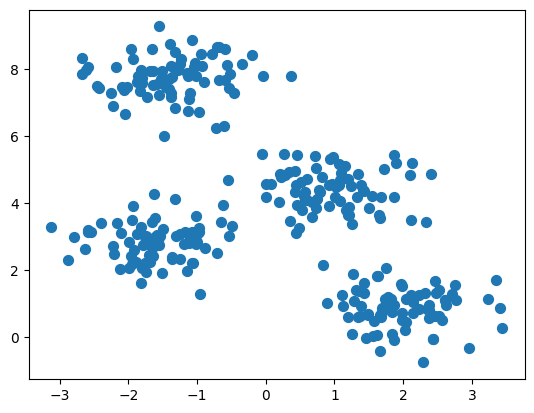

In [ ]:
# Creating the cluter for the dataset
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples = 300,centers=4,
                      cluster_std=0.60,random_state = 0)
plt.scatter(X[:,0],X[:,1],s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_means = kmeans.predict(X)


In [ ]:
y_means

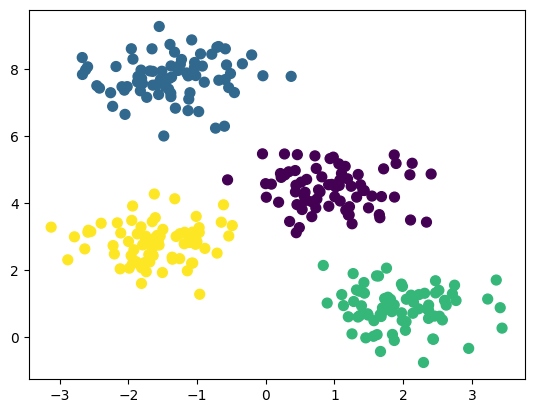

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


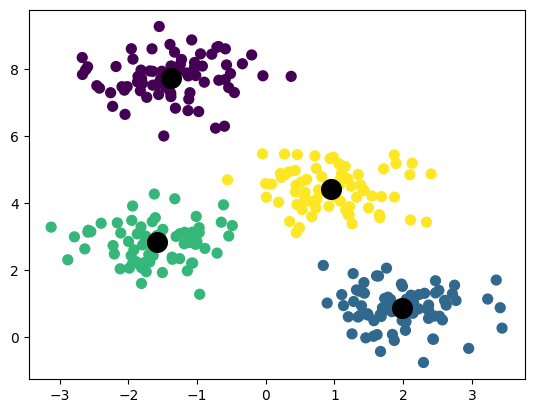

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_means, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);